# Cinema Seating simulator
* couples fill a cinema but leave but there's an empty seat between each couple. 
* consider how many seats are empty 
* is there a general approximation for how many seats remain empty?
* Apparently  roughly 13.5% of seats go unused - Which is 1/(e^2)  
* Reference Joy of X maths book 

## Up Next
* with graphical sumulation doen next is run 1000s of simulations to infer an average fill ration
* does it tend to 13.5%
* what assumptions do I need for this number to become apparent?


In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np


In [2]:

def simulate_cinema(N):
    # Initialize seats (0 = empty, 1 = occupied)
    seats = [0] * N
    couples = 0
    
    while True:
        # Try placing a couple
        found_spot = False
        for _ in range(1000):  # Attempt up to 1000 random placements
            start = random.randint(0, N - 2)
            
            # Check if there's room for a couple with a 1-seat buffer
            if (
                seats[start] == 0 and
                seats[start + 1] == 0 and
                (start + 2 >= N or seats[start + 2] == 0)
            ):
                # Place the couple
                seats[start] = 1
                seats[start + 1] = 1
                if start + 2 < N:
                    seats[start + 2] = 0  # Ensure 1-seat buffer
                couples += 1
                found_spot = True
                break
        
        if not found_spot:
            # No valid spot found for the next couple
            break
    
    return seats, couples


In [3]:

def plot_seating(seats):
    # Create a graphical representation of the seating arrangement
    seat_colors = ['white' if s == 0 else 'blue' for s in seats]
    
    fig, ax = plt.subplots(figsize=(12, 1))
    ax.set_xlim(0, len(seats))
    ax.set_ylim(-1, 1)
    
    # Plot seats as rectangles
    for i, color in enumerate(seat_colors):
        rect = plt.Rectangle((i, -0.5), 1, 1, color=color, edgecolor='black')
        ax.add_patch(rect)
    
    ax.axis('off')  # Turn off axis for a cleaner look
    plt.title(f"Seating Arrangement ({len(seats)} seats)")
    plt.show()


Couples seated: 69, Unoccupied seats: 62


/var/folders/bh/3z0s10hd1wg28h1kqr632vfr0000gn/T/ipykernel_37120/570603279.py:11: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = plt.Rectangle((i, -0.5), 1, 1, color=color, edgecolor='black')


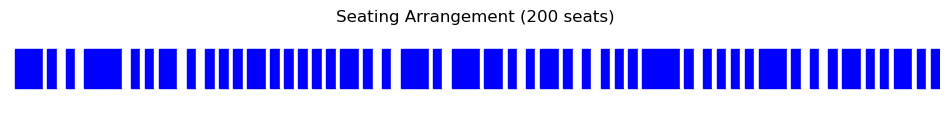

In [5]:

# Run simulation and plot
N = 200  # Number of seats
seats, couples = simulate_cinema(N)
print(f"Couples seated: {couples}, Unoccupied seats: {seats.count(0)}")
plot_seating(seats)


Couples seated: 50, Unoccupied seats: 50


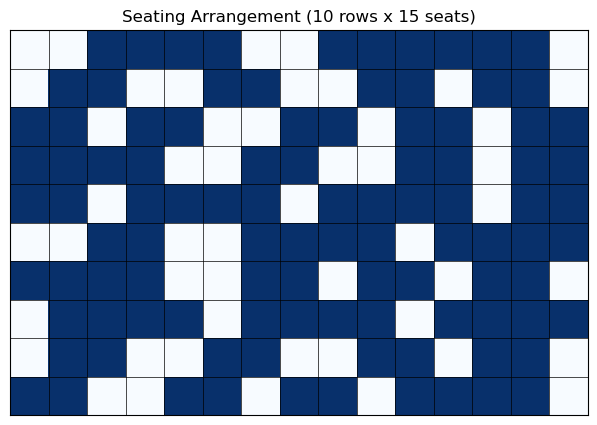

In [6]:


def simulate_cinema(rows, cols):
    # Initialize the 2D seating grid (0 = empty, 1 = occupied)
    seats = np.zeros((rows, cols), dtype=int)
    couples = 0
    
    while True:
        # Try placing a couple
        found_spot = False
        for _ in range(1000):  # Attempt up to 1000 random placements
            row = random.randint(0, rows - 1)
            col = random.randint(0, cols - 2)
            
            # Check if there's room for a couple with a 1-seat buffer
            if (
                seats[row, col] == 0 and
                seats[row, col + 1] == 0 and
                (col + 2 >= cols or seats[row, col + 2] == 0)
            ):
                # Place the couple
                seats[row, col] = 1
                seats[row, col + 1] = 1
                couples += 1
                found_spot = True
                break
        
        if not found_spot:
            # No valid spot found for the next couple
            break
    
    return seats, couples

def plot_seating(seats):
    rows, cols = seats.shape
    fig, ax = plt.subplots(figsize=(cols / 2, rows / 2))
    
    # Plot the grid with colors
    ax.imshow(seats, cmap='Blues', extent=[0, cols, 0, rows])
    
    # Add grid lines for clarity
    for x in range(cols + 1):
        ax.axvline(x, color='black', linewidth=0.5)
    for y in range(rows + 1):
        ax.axhline(y, color='black', linewidth=0.5)
    
    # Adjust the plot
    ax.set_xticks(np.arange(cols) + 0.5)
    ax.set_yticks(np.arange(rows) + 0.5)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(axis='both', length=0)  # Remove tick marks
    ax.set_title(f"Seating Arrangement ({rows} rows x {cols} seats)")
    plt.gca().invert_yaxis()  # Make (0,0) the top-left corner
    plt.show()

# Run the simulation and plot
rows, cols = 10, 15  # Cinema dimensions
seats, couples = simulate_cinema(rows, cols)
print(f"Couples seated: {couples}, Unoccupied seats: {np.sum(seats == 0)}")
plot_seating(seats)
